<a href="https://colab.research.google.com/github/park-geun-hyeong/Computer_Vision/blob/main/CH4/YoloV3_OpenCV_ImageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Git Clone

In [ ]:
! git clone http://github.com/chulminkw/DLCV

## Change Directory

In [3]:
import os 

os.mkdir('/content/DLCV/YOLO')
os.chdir('/content/DLCV/YOLO')
os.getcwd()

'/content/DLCV/YOLO'

## Import Library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import cv2
import time
import os 
from tqdm import tqdm

## DownLoad Pretrained_YOLOv3 model

In [ ]:
!echo "##### downloading pretrained yolo/tiny-yolo weight file and config file"
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O ./yolov3.cfg

!wget https://pjreddie.com/media/files/yolov3-tiny.weights
!wget wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true -O ./yolov3-tiny.cfg

In [7]:
os.listdir('/content/DLCV/YOLO')

['.ipynb_checkpoints',
 'yolov3-tiny.weights',
 'yolov3.weights',
 'yolov3.cfg',
 'yolov3-tiny.cfg']

## Load Model

In [9]:
config_path = '/content/DLCV/YOLO/yolov3.cfg'
weight_path = '/content/DLCV/YOLO/yolov3.weights'

cv_net = cv2.dnn.readNetFromDarknet(config_path, weight_path)

## Label Mapping

In [11]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

##Img_preprocessing

In [13]:
 layer_name = cv_net.getLayerNames()
 outlayer_names = [layer_name[i[0]-1] for i in cv_net.getUnconnectedOutLayers()]

 print(outlayer_names)

['yolo_82', 'yolo_94', 'yolo_106']


In [14]:
img_path = '/content/DLCV/data/image/beatles01.jpg'
img = cv2.imread(img_path) 

cv_net.setInput(cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416,416), swapRB=True, crop=False))

cv_out = cv_net.forward(outlayer_names)
green = (0,255,0)
red = (0,0,255)


In [45]:
row = img.shape[0]
col = img.shape[1]

conf_th = 0.5
nms_th = 0.4

class_idx=[]
confidences=[]
boxes=[]

for ix, output in tqdm(enumerate(cv_out)):
    print('output_shape',output.shape)
    for jx, detection in enumerate(output):
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > conf_th:
            print('ix:',ix,'jx:',jx,'class_id:',class_id, 'confidence:', confidence)
            center_x = int(detection[0]*col)
            center_y = int(detection[1]*row)
            width = int(detection[2]*col)
            height = int(detection[3]*row )

            left = int(center_x - (width/2))
            top = int(center_y - (height/2))

            class_idx.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left,top,width,height])

3it [00:00, 16.81it/s]

output_shape (507, 85)
ix: 0 jx: 319 class_id: 0 confidence: 0.9317017
ix: 0 jx: 328 class_id: 0 confidence: 0.96232384
ix: 0 jx: 334 class_id: 0 confidence: 0.9984486
ix: 0 jx: 343 class_id: 0 confidence: 0.9978433
output_shape (2028, 85)
ix: 1 jx: 831 class_id: 2 confidence: 0.8169964
ix: 1 jx: 955 class_id: 2 confidence: 0.8472691
ix: 1 jx: 1262 class_id: 0 confidence: 0.9877816
ix: 1 jx: 1280 class_id: 0 confidence: 0.99840033
ix: 1 jx: 1295 class_id: 0 confidence: 0.6916561
ix: 1 jx: 1313 class_id: 0 confidence: 0.9205806
output_shape (8112, 85)
ix: 2 jx: 2883 class_id: 2 confidence: 0.9077368
ix: 2 jx: 2886 class_id: 2 confidence: 0.63324535
ix: 2 jx: 3048 class_id: 2 confidence: 0.9412014
ix: 2 jx: 3051 class_id: 2 confidence: 0.615405
ix: 2 jx: 3184 class_id: 2 confidence: 0.95041
ix: 2 jx: 3214 class_id: 2 confidence: 0.9064125
ix: 2 jx: 3373 class_id: 2 confidence: 0.68998003
ix: 2 jx: 3394 class_id: 0 confidence: 0.76407045


In [46]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_th, nms_th)
print(idxs)

[[ 2]
 [ 7]
 [ 3]
 [ 6]
 [14]
 [12]
 [10]
 [15]
 [ 5]
 [ 4]
 [17]
 [16]
 [11]
 [13]]


person: 0.9984
person: 0.9984
person: 0.9978
person: 0.9878
car: 0.9504
car: 0.9412
car: 0.9077
car: 0.9064
car: 0.8473
car: 0.8170
person: 0.7641
car: 0.6900
car: 0.6332
car: 0.6154


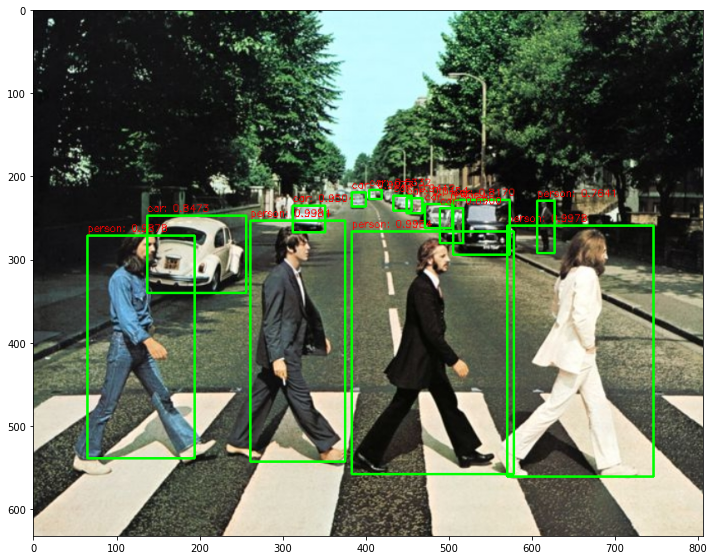

In [53]:
draw_img = img.copy()

if len(idxs) > 0:
    for i in idxs.flatten():
        box = boxes[i]
        left =int(box[0])
        top = int(box[1])
        width = int(box[2])
        height = int(box[3])

        right =  left+width
        bottom = top+height

        caption = "{}: {:.4f}".format(labels_to_names_seq[class_idx[i]], confidences[i])
        cv2.rectangle(draw_img, (left,top), (right, bottom), color= green, thickness=2)
        cv2.putText(draw_img, caption, (left,top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=red, thickness=1)

        print(caption)

img_rgb= cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,12))
plt.imshow(img_rgb)
plt.show()  